<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/DL/18BCE247_DL5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Urvashi Ramdasani

Division : EL3

Aim : CIFAR10 image classification using Transfer Learning (without generators)

In [60]:
# Load the libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, GlobalAveragePooling2D, Dropout
import keras
from sklearn import metrics
from keras.utils import np_utils
from keras.datasets import cifar10
import random
from keras.applications import Xception, ResNet50
from keras.applications.xception import preprocess_input
from keras.applications.resnet import preprocess_input
import cv2

In [61]:
# Load the data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000, 1)
X_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000, 1)


In [62]:
# Class labels

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

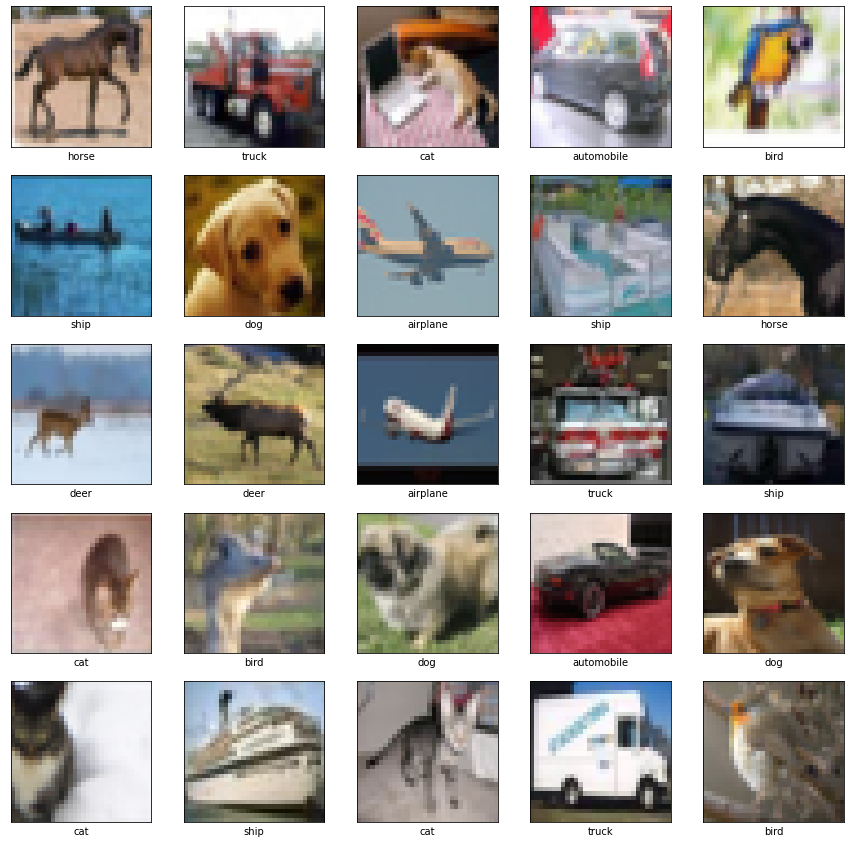

In [63]:
# Plotting random images

plt.figure(figsize = (15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0, len(X_train))
  plt.imshow(X_train[rand_no])
  plt.xlabel(class_names[int(y_train[rand_no])])

In [64]:
# One Hot Encoding

y_train = np_utils.to_categorical(y_train)
y_test_tmp = y_test
y_test = np_utils.to_categorical(y_test)

In [65]:
# Resize for Xception, ResNet50

X_train = np.array([cv2.resize(X_train[i], dsize = (72, 72), interpolation = cv2.INTER_CUBIC) for i in range(len(X_train))]).astype('float32')
X_test = np.array([cv2.resize(X_test[i], dsize = (72, 72), interpolation = cv2.INTER_CUBIC) for i in range(len(X_test))]).astype('float32')
print('X_train after reshape : ', X_train.shape)
print('X_test after reshape : ', X_test.shape)

X_train after reshape :  (50000, 72, 72, 3)
X_test after reshape :  (10000, 72, 72, 3)


In [66]:
# Load pretrained model without top

pretrained_model = Xception(include_top = False, weights = 'imagenet', input_shape = (72, 72, 3))

In [67]:
# Preprocess and generate features

X_train = keras.applications.xception.preprocess_input(X_train[0:35000]) # Maximum images for Xception 35000
X_train = pretrained_model.predict(X_train)
X_test = keras.applications.xception.preprocess_input(X_test)
X_test = pretrained_model.predict(X_test)

In [68]:
# Classifier on top

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape = (7, 7, 2048))) # 
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

# Compile the model

opt = keras.optimizers.RMSprop(learning_rate = 0.001)
model.compile(optimizer = opt, metrics = ['accuracy'], loss = 'categorical_crossentropy')
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_10  (None, 2048)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Train the model

history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
875/875 [==============================] - 4s 4ms/step - loss: 1.0971 - accuracy: 0.6375 - val_loss: 0.8261 - val_accuracy: 0.7323
Epoch 2/10
875/875 [==============================] - 4s 4ms/step - loss: 0.7646 - accuracy: 0.7538 - val_loss: 0.8173 - val_accuracy: 0.7439
Epoch 3/10
875/875 [==============================] - 3s 4ms/step - loss: 0.7129 - accuracy: 0.7678 - val_loss: 0.8001 - val_accuracy: 0.7529
Epoch 4/10
875/875 [==============================] - 3s 4ms/step - loss: 0.6985 - accuracy: 0.7717 - val_loss: 0.7732 - val_accuracy: 0.7577
Epoch 5/10
875/875 [==============================] - 3s 4ms/step - loss: 0.6772 - accuracy: 0.7790 - val_loss: 0.7965 - val_accuracy: 0.7557
Epoch 6/10
875/875 [==============================] - 3s 4ms/step - loss: 0.6657 - accuracy: 0.7820 - val_loss: 0.7945 - val_accuracy: 0.7579
Epoch 7/10
875/875 [==============================] - 3s 4ms/step - loss: 0.6490 - accuracy: 0.7847 - val_loss: 0.7858 - val_accuracy: 0.7623
Epoch 

In [70]:
# Evaluate the model

loss_and_metrics = model.evaluate(X_test, y_test, batch_size = 32)
print("Loss on test data : ", loss_and_metrics[0])
print("Accuracy on test data : ", loss_and_metrics[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.8423 - accuracy: 0.7506
Loss on test data :  0.842338502407074
Accuracy on test data :  0.7505999803543091


In [71]:
# Make predictions

classes = model.predict(X_test, batch_size = 32)
y_predicted = []
for i in range(len(classes)):
  y_predicted.append(np.argmax(classes[i]))
print(y_predicted)

[3, 8, 8, 8, 6, 6, 1, 5, 3, 1, 0, 9, 3, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 4, 2, 3, 6, 9, 6, 6, 5, 4, 5, 9, 5, 7, 9, 9, 5, 4, 6, 5, 3, 2, 9, 3, 8, 7, 6, 9, 8, 0, 3, 3, 0, 7, 4, 5, 5, 7, 3, 3, 3, 2, 4, 9, 2, 5, 4, 3, 6, 8, 8, 0, 2, 7, 3, 5, 8, 8, 1, 1, 7, 7, 7, 2, 7, 8, 9, 1, 3, 8, 6, 4, 3, 6, 4, 0, 7, 4, 5, 6, 3, 1, 1, 2, 6, 2, 7, 4, 0, 6, 2, 1, 3, 0, 4, 6, 7, 8, 5, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 5, 2, 9, 7, 6, 8, 6, 5, 6, 5, 8, 7, 6, 5, 5, 5, 1, 1, 6, 7, 0, 8, 3, 9, 5, 4, 2, 1, 3, 6, 0, 4, 8, 4, 5, 4, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 4, 3, 8, 6, 3, 4, 8, 5, 8, 8, 9, 7, 4, 8, 8, 7, 8, 5, 0, 8, 7, 1, 5, 0, 5, 7, 9, 7, 7, 5, 7, 8, 0, 7, 9, 1, 2, 7, 6, 9, 3, 3, 9, 4, 4, 7, 5, 5, 1, 3, 8, 8, 0, 6, 9, 5, 6, 1, 1, 8, 9, 0, 3, 2, 9, 5, 2, 5, 3, 9, 9, 6, 0, 3, 2, 8, 9, 8, 1, 5, 7, 0, 8, 4, 4, 7, 0, 4, 3, 3, 5, 8, 3, 0, 5, 4, 5, 9, 0, 6, 1, 9, 9, 8, 8, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 5, 2, 6, 0, 8, 2, 9, 6, 8, 6, 8, 8, 4, 0, 3, 7, 5, 5, 3, 3, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 5, 

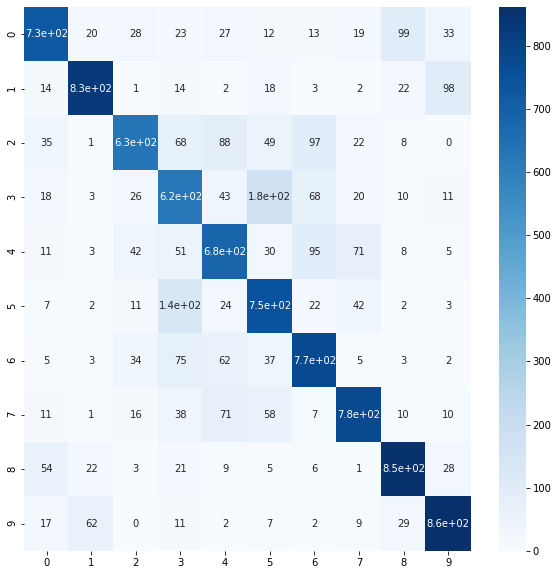

In [72]:
# Confusion matrix

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
cm = metrics.confusion_matrix(y_true = y_test_tmp, y_pred = y_predicted)
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax)

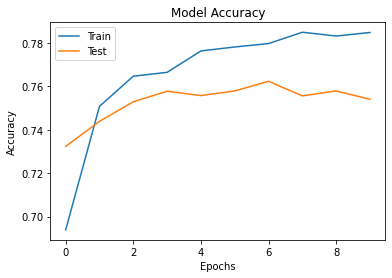

In [73]:
# Accuracy Plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Test'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

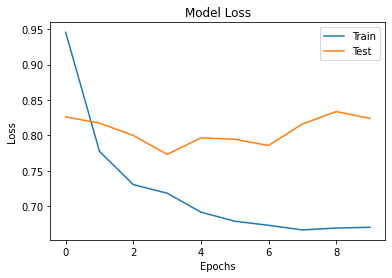

In [74]:
# Loss Plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

Remarks :

1. Using Xception model - Training accuracy - 78.77% Test accuracy - 75.36%. Overfits after 6 epochs. Adam optimizer and learning rate 0.001.
2. Using ResNet50 model - Training accuracy - 75% Test accuracy - 68%. RMSprop optimizer with learning rate 0.001, batch size = 128.
